In [1]:
#import necessary required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset from excel file as it contains 3 sheets so loading different sheets in different dataframes and merging them later

u_detail = pd.read_excel('Upliance_Dataset.xlsx', sheet_name='UserDetails.csv')
cook_sess = pd.read_excel('Upliance_Dataset.xlsx', sheet_name='CookingSessions.csv')
o_details = pd.read_excel('Upliance_Dataset.xlsx', sheet_name='OrderDetails.csv')

In [3]:
u_detail.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [4]:
cook_sess.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7


In [5]:
o_details.head()


,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


In [6]:
u_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 852.0+ bytes


In [7]:
u_detail.describe()

,Age,Registration Date,Total Orders
count,10.000000,10,10.000000
mean,31.800000,2023-05-27 02:24:00,9.400000
min,25.000000,2023-01-15 00:00:00,5.000000
25%,28.250000,2023-03-16 12:00:00,7.250000
50%,30.500000,2023-06-03 00:00:00,8.500000
75%,34.500000,2023-08-01 00:00:00,11.500000
max,42.000000,2023-10-10 00:00:00,15.000000
std,5.266245,NaN,3.339993


In [8]:
cook_sess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session ID       16 non-null     object        
 1   User ID          16 non-null     object        
 2   Dish Name        16 non-null     object        
 3   Meal Type        16 non-null     object        
 4   Session Start    16 non-null     datetime64[ns]
 5   Session End      16 non-null     datetime64[ns]
 6   Duration (mins)  16 non-null     int64         
 7   Session Rating   16 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 1.1+ KB


In [9]:
o_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      16 non-null     int64         
 1   User ID       16 non-null     object        
 2   Order Date    16 non-null     datetime64[ns]
 3   Meal Type     16 non-null     object        
 4   Dish Name     16 non-null     object        
 5   Order Status  16 non-null     object        
 6   Amount (USD)  16 non-null     float64       
 7   Time of Day   16 non-null     object        
 8   Rating        14 non-null     float64       
 9   Session ID    16 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.4+ KB


In [10]:
#### Checking missing values in 3 datasets

In [11]:

print("Missing Values in UserDetails Data")
u_detail.isnull().sum()

Missing Values in UserDetails Data


User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

In [12]:
print("Missing Values in CookingSessions Data")
cook_sess.isnull().sum()

Missing Values in CookingSessions Data


Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

In [13]:
print("Missing Values in OrderDetails Data")
o_details.isnull().sum()

Missing Values in OrderDetails Data


Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64

In [14]:
### Checking For Duplicates in The Datasets

In [15]:
print("Duplicate values in UserDetails")
u_detail.duplicated().sum()

Duplicate values in UserDetails


0

In [16]:
print("Duplicate values in CookingSessions")
cook_sess.duplicated().sum()

Duplicate values in CookingSessions


0

In [17]:
print("Duplicate values in OrderDetails")
o_details.duplicated().sum()

Duplicate values in OrderDetails


0

In [18]:
# Converting date columns to datetime type
u_detail['Registration Date'] = pd.to_datetime(u_detail['Registration Date'])
cook_sess['Session Start'] = pd.to_datetime(cook_sess['Session Start'])
cook_sess['Session End'] = pd.to_datetime(cook_sess['Session End'])
o_details['Order Date'] = pd.to_datetime(o_details['Order Date'])

In [19]:
# Cleaning string columns
u_detail['User Name'] = u_detail['User Name'].str.strip().str.title()
o_details['Dish Name'] = o_details['Dish Name'].str.strip().str.title()


In [20]:
# Standardize phone number format (if needed)
u_detail['Phone'] = u_detail['Phone'].str.replace(r'\D', '', regex=True)

In [21]:
u_detail

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,1234567890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,9876543210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,5551234567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,4443332222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,7778889999,emma@email.com,Lunch,9
5,U006,Frank Green,25,Austin,2023-06-15,8887776666,frank@email.com,Dinner,7
6,U007,Grace King,38,Boston,2023-07-02,9998887777,grace@email.com,Breakfast,14
7,U008,Henry Lee,31,Miami,2023-08-11,1012023030,henry@email.com,Dinner,5
8,U009,Irene Moore,33,Dallas,2023-09-01,2023034040,irene@email.com,Lunch,6
9,U010,Jack White,29,Phoenix,2023-10-10,3034045050,jack@email.com,Dinner,8


In [22]:
cook_sess

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [23]:
o_details

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010


In [24]:
# Adding some calculated columns for better understanding
o_details['Order Weekday'] = o_details['Order Date'].dt.day_name()
o_details['Order Month'] = o_details['Order Date'].dt.month_name()

In [25]:
o_details

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID,Order Weekday,Order Month
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001,Sunday,December
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002,Sunday,December
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003,Monday,December
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004,Monday,December
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005,Tuesday,December
5,1006,U002,2024-12-03,Dinner,Spaghetti,Completed,14.0,Night,4.0,S006,Tuesday,December
6,1007,U005,2024-12-04,Dinner,Grilled Chicken,Completed,13.5,Night,4.0,S007,Wednesday,December
7,1008,U003,2024-12-04,Lunch,Veggie Burger,Canceled,11.0,Day,NaN,S008,Wednesday,December
8,1009,U001,2024-12-05,Dinner,Grilled Chicken,Completed,12.0,Night,5.0,S009,Thursday,December
9,1010,U002,2024-12-05,Breakfast,Oatmeal,Completed,7.0,Morning,4.0,S010,Thursday,December


In [26]:
cook_sess

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00:00,2024-12-01 19:30:00,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00:00,2024-12-01 12:20:00,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30:00,2024-12-02 20:10:00,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30:00,2024-12-02 08:00:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00:00,2024-12-03 13:15:00,15,4.7
5,S006,U002,Spaghetti,Dinner,2024-12-03 18:30:00,2024-12-03 19:00:00,30,4.3
6,S007,U005,Grilled Chicken,Dinner,2024-12-04 18:00:00,2024-12-04 18:45:00,45,4.6
7,S008,U003,Veggie Burger,Lunch,2024-12-04 13:30:00,2024-12-04 13:50:00,20,4.4
8,S009,U001,Grilled Chicken,Dinner,2024-12-05 19:00:00,2024-12-05 19:40:00,40,4.9
9,S010,U002,Oatmeal,Breakfast,2024-12-05 07:00:00,2024-12-05 07:10:00,10,4.1


In [27]:
# Merging CookingSessions with UserDetails
cook_plus_user = cook_sess.merge(u_detail, on='User ID', how='inner')

# Merging cook_plus_user dataset with OrderDetails datasets
df_final =cook_plus_user.merge(o_details, on=['User ID', 'Session ID'], how='inner')

# Preview of the the merged data
print("Merged Dataset:", df_final.head())

Merged Dataset:   Session ID User ID      Dish Name_x Meal Type_x       Session Start  \
0       S001    U001        Spaghetti      Dinner 2024-12-01 19:00:00   
1       S004    U001         Pancakes   Breakfast 2024-12-02 07:30:00   
2       S009    U001  Grilled Chicken      Dinner 2024-12-05 19:00:00   
3       S002    U002     Caesar Salad       Lunch 2024-12-01 12:00:00   
4       S006    U002        Spaghetti      Dinner 2024-12-03 18:30:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
2 2024-12-05 19:40:00               40             4.9  Alice Johnson   28   
3 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
4 2024-12-03 19:00:00               30             4.3      Bob Smith   35   

   ... Order ID Order Date Meal Type_y      Dish Name_y Order Status  \
0  .

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Session ID         16 non-null     object        
 1   User ID            16 non-null     object        
 2   Dish Name_x        16 non-null     object        
 3   Meal Type_x        16 non-null     object        
 4   Session Start      16 non-null     datetime64[ns]
 5   Session End        16 non-null     datetime64[ns]
 6   Duration (mins)    16 non-null     int64         
 7   Session Rating     16 non-null     float64       
 8   User Name          16 non-null     object        
 9   Age                16 non-null     int64         
 10  Location           16 non-null     object        
 11  Registration Date  16 non-null     datetime64[ns]
 12  Phone              16 non-null     object        
 13  Email              16 non-null     object        
 14  Favorite Mea

In [29]:
#Checking for duplicated columns
df_final.T.duplicated()

Session ID           False
User ID              False
Dish Name_x          False
Meal Type_x          False
Session Start        False
Session End          False
Duration (mins)      False
Session Rating       False
User Name            False
Age                  False
Location             False
Registration Date    False
Phone                False
Email                False
Favorite Meal        False
Total Orders         False
Order ID             False
Order Date           False
Meal Type_y           True
Dish Name_y           True
Order Status         False
Amount (USD)         False
Time of Day          False
Rating               False
Order Weekday        False
Order Month          False
dtype: bool

In [30]:
# Dropping unnecessary duplicated columns
df_final = df_final.drop(columns=['Dish Name_y', 'Meal Type_y'])

# Renaming the retained columns to its original names
df_final.rename(columns={'Dish Name_x': 'Dish Name', 'Meal Type_x': 'Meal Type'}, inplace=True)

# Verifying the result
print(df_final.head())

  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S004    U001         Pancakes  Breakfast 2024-12-02 07:30:00   
2       S009    U001  Grilled Chicken     Dinner 2024-12-05 19:00:00   
3       S002    U002     Caesar Salad      Lunch 2024-12-01 12:00:00   
4       S006    U002        Spaghetti     Dinner 2024-12-03 18:30:00   

          Session End  Duration (mins)  Session Rating      User Name  Age  \
0 2024-12-01 19:30:00               30             4.5  Alice Johnson   28   
1 2024-12-02 08:00:00               30             4.2  Alice Johnson   28   
2 2024-12-05 19:40:00               40             4.9  Alice Johnson   28   
3 2024-12-01 12:20:00               20             4.0      Bob Smith   35   
4 2024-12-03 19:00:00               30             4.3      Bob Smith   35   

   ... Favorite Meal Total Orders Order ID Order Date Order Status  \
0  ...        Dinner        

In [31]:
# Grouping by User ID to find total sessions and orders
user_act = df_final.groupby('User ID').agg({
    'Session ID': 'nunique', 
    'Order ID': 'nunique'
}).reset_index()
user_act.rename(columns={'Session ID': 'Total Sessions', 'Order ID': 'Total Orders'}, inplace=True)

In [32]:
user_act

,User ID,Total Sessions,Total Orders
0,U001,3,3
1,U002,3,3
2,U003,3,3
3,U004,2,2
4,U005,2,2
5,U006,1,1
6,U007,1,1
7,U008,1,1


In [33]:
# Correlation analysis between Total Sessions and Total Orders
correlation = user_act['Total Sessions'].corr(user_act['Total Orders'])
print("Correlation between Total Sessions and Total Orders:", correlation)

Correlation between Total Sessions and Total Orders: 1.0


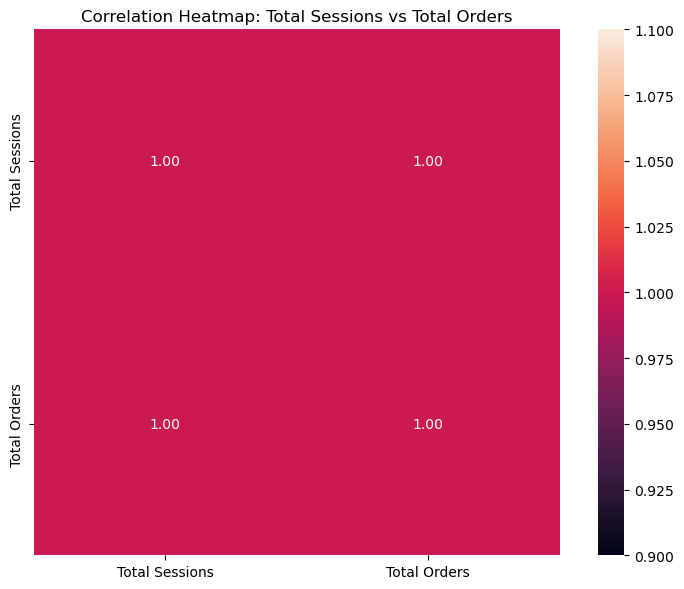

In [34]:
corr_matrix = user_act[['Total Sessions', 'Total Orders']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap: Total Sessions vs Total Orders")
plt.tight_layout()
plt.show()

In [35]:
# Counting the most popular dishes
pop_dishes = df_final['Dish Name'].value_counts().head(10)
print("Most Popular Dishes:\n", pop_dishes)

Most Popular Dishes:
 Dish Name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [36]:
# Grouping by age to analyze orders
age_group_orders = df_final.groupby('Age')['Order ID'].count().reset_index()
print("Orders by Age Group:\n", age_group_orders)

Orders by Age Group:
    Age  Order ID
0   25         1
1   27         2
2   28         3
3   30         2
4   31         1
5   35         3
6   38         1
7   42         3


In [37]:
# Grouping by location to analyze orders
loc_orders = df_final['Location'].value_counts()
print("Orders by Location:\n", loc_orders)

Orders by Location:
 Location
New York         3
Los Angeles      3
Chicago          3
San Francisco    2
Seattle          2
Austin           1
Boston           1
Miami            1
Name: count, dtype: int64


In [38]:
sns.set_theme(style="whitegrid")

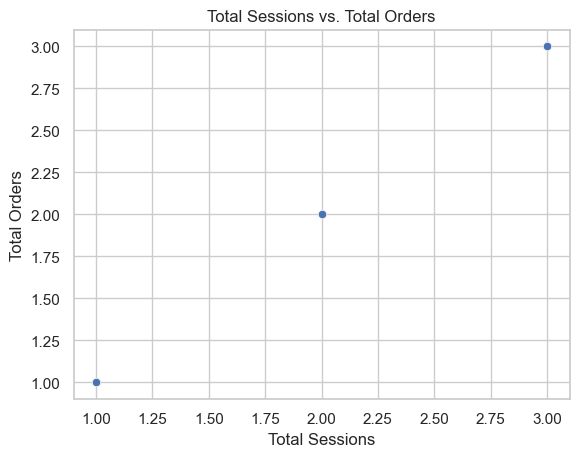

In [39]:
sns.scatterplot(data=user_act, x='Total Sessions', y='Total Orders')
plt.title('Total Sessions vs. Total Orders')
plt.xlabel('Total Sessions')
plt.ylabel('Total Orders')
plt.show()

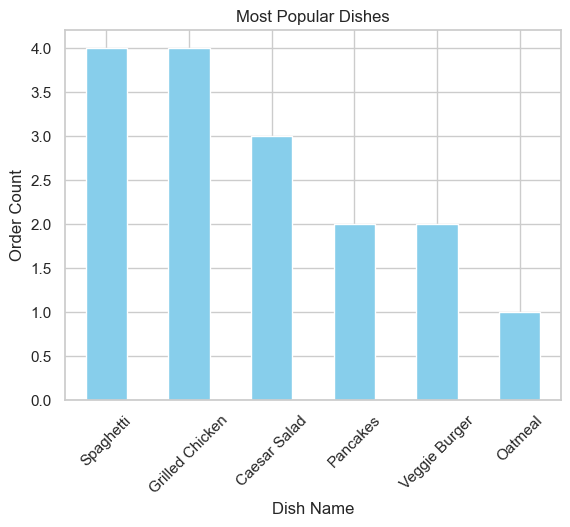

In [40]:
pop_dishes.plot(kind='bar', color='skyblue')
plt.title('Most Popular Dishes')
plt.xlabel('Dish Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

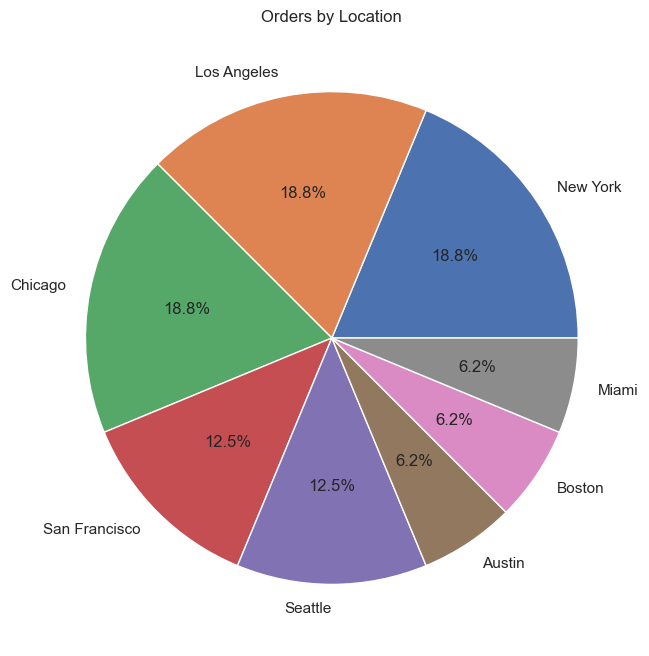

In [41]:
loc_orders.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Orders by Location')
plt.ylabel('')
plt.show()